In [1]:
!rm -rf ./diplom
!git clone https://github.com/Churilinavalentina/diplom.git -b test_case

Cloning into 'diplom'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


# Новый раздел

In [2]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
from re import L

In [3]:
Capital = 10000  # Первоначальный капитал
l = 0.5  # Коэффициент порового спреда
t = 22*13  # Количество временных интервалов для расчетов (22*13 - это 1 месяц). То есть в данном случае алгоритм сичтает, 
          # что заранее известны только данные за месяц, на основе их анализа он принимает решения. 
          # Данные за остальное время изначально считаются неизвестными, на них демонстрируется работоспособность алгоритма.
T = 200  #Период, по которому аппроксимируется спред
tax = 0.0005 # Доля которую удерживает брокер при сделке

In [4]:
first_share = []
second_share = []
Axis = []

with open('/content/drive/MyDrive/МосБиржа акции_01_01_2020_01_05_2022/газпром ао_gazp_2_1_moex-akcii_gazprom.csv', newline='') as File:
    reader = csv.reader(File, delimiter = ",")
    count = 0
    for row in reader:
      if count != 0 and int(row[2]) <= 20220501 and int(row[2]) >= 20211101:
        first_share.append(float(row[4]))
      count = count + 1
        
with open('/content/drive/MyDrive/МосБиржа акции_01_01_2020_01_05_2022/роснефть_rosn_2_1_moex-akcii_rosneft.csv', newline='') as File:
    reader = csv.reader(File, delimiter = ",")
    count = 0
    for row in reader:
      if count != 0 and int(row[2]) <= 20220501 and int(row[2]) >= 20211101:
        second_share.append(float(row[4]))
        Axis.append(row[2])
      count = count + 1


In [5]:
# Метод наименьших квадратов. Полином второй степени.

def MNK_1(X, Y):
  A = [[0] * 3 for i in range(len(X))]
  X_norm = []
  for j in range(len(X)):
    A[j][0] = X[j]*X[j]
    A[j][1] = X[j]
    A[j][2] = 1
  b = np.array(A)
  Norm = np.linalg.pinv(b).dot(Y)
  for i in range(len(X)):
    X_norm.append(Norm[0]*X[i]*X[i] + Norm[1]*X[i] + Norm[2])
  return(X_norm)

#print(MNK(first_share,second_share))

In [6]:
# Метод наименьших квадратов. Полином пятой степени.

def MNK(X, Y, max_pow=8):
  A = np.vstack([np.array(X)**i for i in range(max_pow+1)]).T
  Norm = np.linalg.pinv(A).dot(Y)
  return A @ Norm

#print(MNK_5(first_share,second_share))

In [7]:
# Нормировка на среднем

def norm(A, B, t):
  norm_B = []
  for i in range(len(A)):
    sum_k = 0 
    for j in range(t):
      if i >= t:
        sum_k = sum_k + A[i+j-t] / B[i+j-t]
      else:
        sum_k = sum_k + A[j] / B[j]
    norm_B.append(B[i] * sum_k / t)
  return(norm_B)

norm_B = norm(first_share, second_share, t)
print(norm_B)

[357.03236721072165, 355.99594813126174, 358.32088822842866, 358.76906945197885, 358.4049222078443, 357.48054843427195, 357.03236721072165, 357.5365710872157, 358.7970807784508, 358.34889955490047, 358.7970807784508, 358.6010014931475, 358.7970807784508, 359.10520536964157, 360.22565842851725, 360.4217377138205, 360.05759046968586, 357.42452578132816, 356.7522539460027, 355.407710275352, 354.9875403782736, 353.5029400752634, 353.614985381151, 353.614985381151, 354.0631666047012, 354.2592458900045, 353.5029400752634, 353.97913262528556, 351.290045283984, 347.62056151616633, 347.5365275367506, 349.63737702214246, 347.98470876030086, 348.04073141324466, 347.4244822308631, 347.3964709043912, 347.8726634544134, 346.2199951925718, 346.78022172200957, 346.78022172200957, 346.36005182493125, 346.9482896808409, 343.3628398924389, 344.3152249924832, 343.586930504214, 345.379655398415, 346.41607447787504, 348.2928333514917, 348.34885600443545, 347.5085162102787, 347.0323236602566, 349.49732038978

In [8]:
# Вычисление преполагаемого спреда

def spred(A, norm_B, t):
  sum_spred = 0
  for i in range(t):
    sum_spred = A[i] - norm_B[i]
  return(sum_spred / t)

Sp = spred(first_share[:t], norm_B[:t], t)
print(Sp)

0.07497147192501492


Стоимость портфеля 7512.820658962508
Доходность портфеля при арбитраже -24.87179341037492 %
Доходность без арбитража -28.157569334039916 %


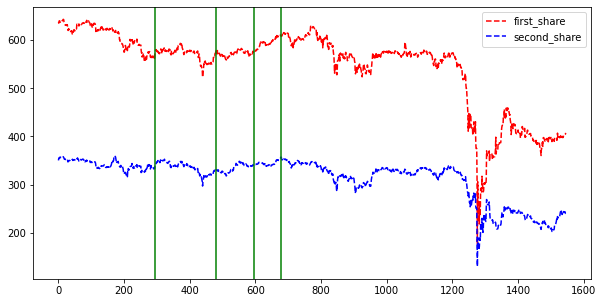

In [9]:
first_share_norm = MNK(first_share[0:t], second_share[0:t])
Spred = []
Axis1 = [i for i in range(len(first_share))]
ind = 0
if second_share[t-1]-first_share_norm[t-1] < 0:
    ind = 1

Sdel = []
N_r = 0
N_g = 0
Prib = Capital
Stoim = Capital
First_price = 0
Second_price = 0

for i in range(t,len(first_share)):
    first_share_norm = MNK(first_share[i-t:i], second_share[i-t:i], 2)
    Spred = second_share[i-T:i] - first_share_norm[t-T:t]
    Spred_approx = MNK(Axis1[i-T:i], Spred[0:T], 5)
    if ind == 0 and second_share[i] > Second_price + 5*Stoim*tax // first_share[i]\
        and Spred_approx[len(Spred_approx)-2] >= Spred_approx[len(Spred_approx)-1]  \
        and Spred[T-1] >0 and abs(Spred[T-1]) > (2*Stoim // first_share[i])*5*tax:
          Prib = Prib + N_r*second_share[i]*(1-tax)
          #print(Axis1[i],'Продали', round(N_r),'шт. привелигированных по цене',second_share[i],'стоимость портфеля =', Prib )
          N_r = 0
          N_g = Prib//(first_share[i]*(1+tax))
          Prib = Prib - N_g*first_share[i]*(1+tax)
          Stoim = Prib + N_g*first_share[i]*(1-tax)
          First_price = first_share[i]
          ind = 1
          #print(Axis1[i],'Купили ',round(N_g),'шт. обычных акций по цене',first_share[i],', остаток = ',Prib,'стоимость портфеля =', Stoim)
          Sdel.append(i)
    elif ind == 1 and first_share[i] > First_price + 5*Stoim*tax//second_share[i] \
        and Spred_approx[len(Spred_approx)-2] <= Spred_approx[len(Spred_approx)-1] \
        and Spred[T-1] < 0 and abs(Spred[T-1]) > (2*Stoim//second_share[i])*5*tax:
          Prib = Prib + N_g*first_share[i]*(1-tax)
          #print(Axis1[i],'Продали ',round(N_g),'шт. обычных по цене',first_share[i],'стоимость портфеля =', Prib)
          N_g = 0
          N_r = Prib//second_share[i]*(1+tax)
          Prib = Prib - N_r*second_share[i]*(1+tax)
          Stoim = Prib + N_r*second_share[i]*(1-tax)
          Second_price = second_share[i]
          ind = 0
          #print(Axis1[i],'Купили ',round(N_r),'шт. привелигированных по цене',second_share[i],', остаток = ',Prib,'стоимость портфеля =', Stoim)
          Sdel.append(i)

print('Стоимость портфеля', Prib + N_g * first_share[len(first_share)-1] * (1-tax) + N_r*second_share[len(second_share)-1]*0.9995)
Prib = (Prib + N_g * first_share[len(first_share)-1] * (1-tax) + N_r*second_share[len(second_share)-1]*(1-tax)-Capital)/Capital*100
print('Доходность портфеля при арбитраже', Prib, '%')
print('Доходность без арбитража', (-second_share[t]+second_share[len(first_share)-1])/second_share[t+1]*100, '%')

# строим график
plt.figure(figsize=(10, 5))
plt.plot(Axis1,second_share, 'r--', label = 'first_share')
plt.plot(Axis1,first_share, 'b--', label = 'second_share')
M = Sdel
for i in range(len(M)):
    plt.axvline(x=M[i], color='green')
plt.legend()
plt.show()


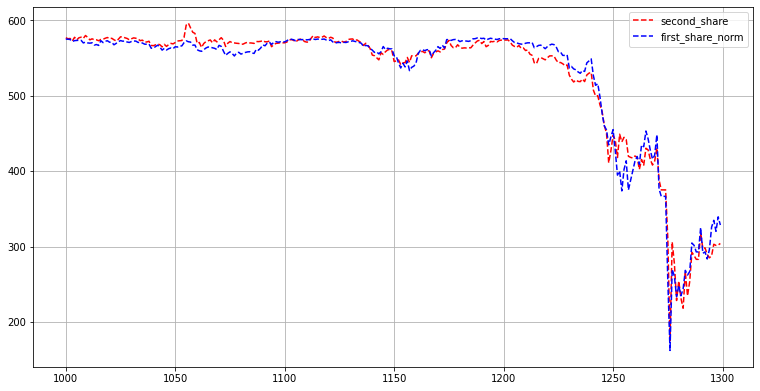

In [12]:
S = 1000
F = 1300

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0, 0, 1, 1])

first_share_norm_1 = MNK(first_share[S:F], second_share[S:F])
plt.plot(Axis1[S:F],second_share[S:F], 'r--', label = 'second_share')
#plt.plot(Axis1[S:F],first_share[S:F], 'b--', label = 'first_share')
plt.plot(Axis1[S:F],first_share_norm_1, 'b--', label = 'first_share_norm')
#ax.axvline(Axis1[S:F][max_x], color='black')
for i in M[18:20]:
    plt.axvline(x=i, color='green')

ax.grid('both')
plt.legend()

499
[]


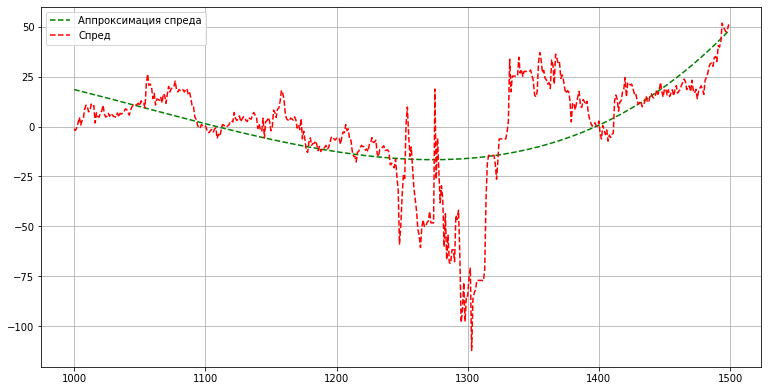

In [17]:
S = 1000
D = 1500

first_share_norm = MNK(first_share[S:D], second_share[S:D], 1)
Spred = second_share[S:D] - first_share_norm
Spred_approx_5 = MNK(Axis1[S:D], Spred, 4)

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0, 0, 1, 1])
#plt.plot(Axis1[:t],Spred_approx, 'r--', label = 'Spred')
ax.plot(Axis1[S:D],Spred_approx_5, 'g--', label = 'Аппроксимация спреда')
ax.plot(Axis1[S:D],Spred, 'r--', label = 'Спред')
ax.grid('both')
max_x = np.argmax(Spred_approx_5)

for i in M[18:20]:
    plt.axvline(x=i, color='green')

print(max_x)

plt.legend()
print(Spred[S:D])